<a href="https://colab.research.google.com/github/canhtc/KTCNPM/blob/master/K61_SVM_XT_AC_Total_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [12]:

import numpy as np
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
from glob import glob

In [13]:
# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/vietnam_datasets/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/vietnam_datasets/test/data6.csv'

path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/*.csv'
path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/test_k59/dataH.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/test/data_6.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/test/data_10.csv'

In [14]:
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_at = data['AC'].values
  data_total_at = data['TOTAL_AC'].values

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_at[k])
      
      temp_3D.append(temp_2D)
      data_output1D.append(data_total_at[k])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape((len(x_train)*3,2))
y_train = y_train.reshape(-1,1)
y_train = np.ravel(y_train)

print(x_train.shape,y_train.shape)
print(x_train[:4],y_train[:4])

['/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataB.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataG.csv']
(273, 2) (273,)
[[ 0.13 46.04]
 [ 0.17 65.49]
 [ 0.24 79.21]
 [ 0.17 65.49]] [259.69 259.69 259.69 259.69]


In [15]:
test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values 
ip_test_at = test['AC'].values
test_output = test['TOTAL_AC'].values

x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_at[k])
    
    temp_3D.append(temp_2D)
    data_output1D.append(test_output[k])

  data_input2D.append(temp_3D)
x_input.append(data_input2D)
y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0)
y_output = np.concatenate( y_output, axis=0)

x_test = np.asarray(x_input)
y_test = np.asarray(y_output)

x_test = x_input.reshape((len(x_input)*3,2))
y_test = y_test.reshape(-1,1)
y_test = np.ravel(y_test)

print(x_test.shape,y_test.shape)
print(x_test, y_test)

(48, 2) (48,)
[[1.6000e-01 1.7369e+02]
 [2.1000e-01 2.1994e+02]
 [2.6000e-01 2.6936e+02]
 [2.1000e-01 2.1994e+02]
 [2.6000e-01 2.6936e+02]
 [3.0000e-01 3.2039e+02]
 [2.6000e-01 2.6936e+02]
 [3.0000e-01 3.2039e+02]
 [3.6000e-01 3.6985e+02]
 [3.0000e-01 3.2039e+02]
 [3.6000e-01 3.6985e+02]
 [4.2000e-01 4.1468e+02]
 [3.6000e-01 3.6985e+02]
 [4.2000e-01 4.1468e+02]
 [4.7000e-01 4.8741e+02]
 [4.2000e-01 4.1468e+02]
 [4.7000e-01 4.8741e+02]
 [5.4000e-01 5.5553e+02]
 [4.7000e-01 4.8741e+02]
 [5.4000e-01 5.5553e+02]
 [6.1000e-01 6.2454e+02]
 [5.4000e-01 5.5553e+02]
 [6.1000e-01 6.2454e+02]
 [6.8000e-01 6.9023e+02]
 [6.1000e-01 6.2454e+02]
 [6.8000e-01 6.9023e+02]
 [7.4000e-01 7.5142e+02]
 [6.8000e-01 6.9023e+02]
 [7.4000e-01 7.5142e+02]
 [8.0000e-01 8.1065e+02]
 [7.4000e-01 7.5142e+02]
 [8.0000e-01 8.1065e+02]
 [8.5000e-01 8.5768e+02]
 [8.0000e-01 8.1065e+02]
 [8.5000e-01 8.5768e+02]
 [8.9000e-01 8.9862e+02]
 [8.5000e-01 8.5768e+02]
 [8.9000e-01 8.9862e+02]
 [9.2000e-01 9.3329e+02]
 [8.9000e-0

In [16]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5],
            'gamma': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
        # neg_root_mean_squared_error
        # neg_mean_squared_error
        # neg_mean_absolute_error

In [17]:
grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_
print(best_params)
best_svr = SVR(kernel='rbf', C=best_params["C"], gamma=best_params["gamma"])

{'C': 1000.0, 'gamma': 1e-06}


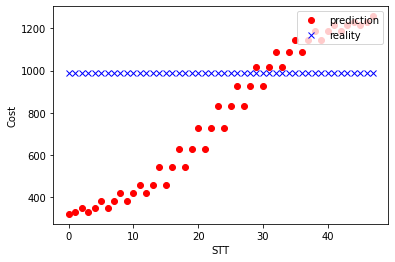

pecent:  [32.40451906774871, 33.40616190125125, 35.37764752050164, 33.40616190125125, 35.37764752050164, 38.39021105263753, 35.37764752050164, 38.39021105263753, 42.233132495398436, 38.39021105263753, 42.233132495398436, 46.46228259883603, 42.233132495398436, 46.46228259883603, 54.69251873026275, 46.46228259883603, 54.69251873026275, 63.700373031006706, 54.69251873026275, 63.700373031006706, 73.78023843717725, 63.700373031006706, 73.78023843717725, 83.92322501106867, 73.78023843717725, 83.92322501106867, 93.5358102338765, 83.92322501106867, 93.5358102338765, 97.29254507727092, 93.5358102338765, 97.29254507727092, 90.27945008047567, 97.29254507727092, 90.27945008047567, 84.47486535509016, 90.27945008047567, 84.47486535509016, 79.83782335659411, 84.47486535509016, 79.83782335659411, 77.10341906550894, 79.83782335659411, 77.10341906550894, 75.47645551375611, 77.10341906550894, 75.47645551375611, 72.92832411626597]
accuracy:  66.7989313364822
mean_squared_error:  152697.2839888033
mean_abs

In [18]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

best_svr.fit(x_train, y_train)

result = best_svr.predict(x_test)
print()
test_output = y_test.reshape(result.size)
plt.plot(result,'o', color='r')
plt.plot(test_output,'x', color='b')
plt.xlabel("STT")
plt.ylabel("Cost")
# print("actually: ",test_output)
# print("model: ", result)

plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

percent = []
acc = 0

for i in range(y_test.size):
  p = (1- abs(y_test[i]-result[i])/test_output[i])*100
  percent.append(p)
  acc += p
print("pecent: ", percent)
print("accuracy: ", acc/(result.size))
print("mean_squared_error: ", mean_squared_error(test_output,result))
print("mean_absolute_error: ", mean_absolute_error(test_output,result))

In [19]:
C_2d_range = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
gamma_2d_range = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
classifiers = []

for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVR(kernel='rbf', C=C, gamma=gamma)
        clf.fit(x_train, y_train)
        classifiers.append((C, gamma, clf))
max_acc = 0
best_C = 0
best_gamma = 0

for (k, (C, gamma, clf)) in enumerate(classifiers):
  # print(C, gamma,clf.predict(x_test))
  # print(C, gamma)
  result = clf.predict(x_test)
  acc = 0
  for i in range(y_test.size):
    acc += (1- abs(y_test[i]-result[i])/y_test[i])*100
  print(acc / y_test.size)
  if(max_acc!=max(max_acc,acc / y_test.size)):
    max_acc = max(max_acc,acc / y_test.size)
    best_C = C
    best_gamma = gamma

print("MAX acc:", max_acc, ", BEST C: ",best_C, ", BEST_gamma: ", best_gamma)


53.463916279821966
53.46391631364096
53.463916650790715
53.46391992034793
53.463944568028715
53.46398960763818
53.4639630118755
53.463931507731935
53.46392170673468
53.46391837999942
53.463915917533136
53.46391577097524
53.46391577097137
53.46391577097137
53.46391577097137
53.46391577097137
53.46391577097137
53.46391577097137
53.46391577097137
53.46391577097137
53.46391631365511
53.46391665184567
53.46392002334255
53.46395271891465
53.46419919572221
53.46464959181758
53.464383634190646
53.46406859275482
53.46397058278242
53.46393731542952
53.46391269076699
53.46391122518819
53.4639112251495
53.4639112251495
53.4639112251495
53.4639112251495
53.4639112251495
53.4639112251495
53.4639112251495
53.4639112251495
53.46391665198673
53.46392003389278
53.46395374886064
53.464280704581874
53.46674547265824
53.47124943361092
53.468589857342785
53.465439442983325
53.46445934326014
53.464126669730774
53.46388042310573
53.46386576731758
53.46386576693066
53.46386576693066
53.46386576693066
53.463865

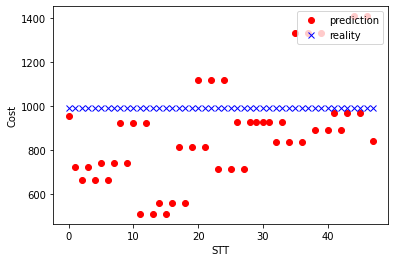

pecent:  [96.26042441950521, 72.80980655882476, 66.9487933798044, 72.80980655882476, 66.9487933798044, 74.97305102571418, 66.9487933798044, 74.97305102571418, 93.40291142434522, 74.97305102571418, 93.40291142434522, 51.45225550830239, 93.40291142434522, 51.45225550830239, 56.60410733300252, 51.45225550830239, 56.60410733300252, 82.27159931721806, 56.60410733300252, 82.27159931721806, 87.0051640683708, 82.27159931721806, 87.0051640683708, 72.05996177791837, 87.0051640683708, 72.05996177791837, 93.7715603022817, 72.05996177791837, 93.7715603022817, 93.5301373236645, 93.7715603022817, 93.5301373236645, 84.43663952981785, 93.5301373236645, 84.43663952981785, 65.33925072676784, 84.43663952981785, 65.33925072676784, 90.18565855573073, 65.33925072676784, 90.18565855573073, 97.82318118047714, 90.18565855573073, 97.82318118047714, 57.79846707191296, 97.82318118047714, 57.79846707191296, 84.7429985796002]
accuracy:  78.57568301293388
mean_squared_error:  65251.14117060064
mean_absolute_error:  2

In [20]:
from sklearn.metrics import mean_absolute_error
model = SVR(kernel='rbf', C=best_C, gamma=best_gamma)

model.fit(x_train, y_train)
result = model.predict(x_test)

test_output = y_test.reshape(result.size)
plt.plot(result,'o', color='r')
plt.plot(test_output,'x', color='b')
plt.xlabel("STT")
plt.ylabel("Cost")
# print("actually: ",test_output)
# print("model: ", result)

plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

percent = []
acc = 0

for i in range(y_test.size):
  p = (1- abs(y_test[i]-result[i])/test_output[i])*100
  percent.append(p)
  acc += p
print("pecent: ", percent)
print("accuracy: ", acc/(result.size))

print("mean_squared_error: ", mean_squared_error(test_output,result))
print("mean_absolute_error: ", mean_absolute_error(test_output,result))
print("mean_absolute_error: ", mean_absolute_error(test_output,result))